In [2]:
from sklearn import datasets


In [4]:
'''
How to use support Vector machine ?DOc 
from sklean import svm 
clf = svm.SVC()
clf.fit()

disadvantages of support vector machines include:

SVMs do not directly provide probability estimates, theses are calculated using an expensive five-fold cross-validation
'''

'\nHow to use support Vector machine ?DOc \nfrom sklean import svm \nclf = svm.SVC()\nclf.fit()\n\ndisadvantages of support vector machines include:\n\nSVMs do not directly provide probability estimates, theses are calculated using an expensive five-fold cross-validation\n'

In [5]:
from sklearn import svm 
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X,y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
clf.predict([[2., 2.]])

array([1])

In [7]:
#get support vectors
#get indices of support vectors
#get number of support vectors for each class


In [8]:
clf.support_vectors_
clf.support_
clf.n_support_

array([1, 1], dtype=int32)

In [9]:
'''

##code for the quiz
from sklearn.svm import SVC
clf = SVC(kernel='linear)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

def submitAccuracy():
    return acc
'''

"\n\n##code for the quiz\nfrom sklearn.svm import SVC\nclf = SVC(kernel='linear)\npred = clf.predict(features_test)\n\nfrom sklearn.metrics import accuracy_score\nacc = accuracy_score(pred, labels_test)\n\ndef submitAccuracy():\n    return acc\n"

In [10]:
'''
try different kernel 

The one that we're using is SVC , the support vector classifier

'''


"\ntry different kernel \n\nThe one that we're using is SVC , the support vector classifier\n\n"

In [11]:
## Example for the parameter :  gammar and C  in SVM 
## from sklearn doc RBF SVM parameters

In [12]:
print(__doc__)

Automatically created module for IPython interactive environment


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [16]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [17]:
## Utility function to move the midpoint of a clolor map to be around 
# the value of interest.


In [19]:
class MidPointNormalize(Normalize):
    
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
        
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax ], [0, 0.5, 1]
        
        return np.ma.masked_array(np.interp(value, x, y))
    
    

In [20]:
# ##########################
# Load and prepare data set 
iris = load_iris()
X = iris.data
y = iris.target

#DataSet for decision funtion visualtion: we noly keep the first two 
# featrues in x and sub-sample the dataset to keep only 2 classes and 
# make it a binary classification problem 


In [21]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

In [22]:
# It is usuall a good idea to scale the data for svm training.
# we are cheating a bit in this example in scaling all of the data, 
# instead of fitting the transformation on the training set and 
# just applying it on the test set . 


In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)


In [26]:
# ########
# Train classifiers 
#
# For an initial search, al Logarithmic grid with basis
# 10 is oftern helpful. Using a basis of 2, a finer 
# tunning cna be achieved but at a much higer cost . 


In [27]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-09,   1.00000e-08,   1.00000e-07,   1.00000e-06,
         1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03]), 'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, v

In [33]:
print("The best parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.10000000000000001} with a score of 0.97


In [34]:
# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of the parameters here because it takes a while to train)

In [36]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C,gamma, clf))
        
        

In [37]:
# ####################
# Visualization
#
# draw visualization of parameter effects


In [44]:
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3, 3, 200))

for (k, (c, gamma, clf )) in enumerate(classifiers):
    # evaluate decision function in a grid 
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # visualize decision   function for these parameters 
    plt.subplot(len(C_2d_range),len(gamma_2d_range), k+1)
    plt.title("gamma=10^%d , C= 10^%d" %(np.log10(gamma), np.log10(C)), 
                size='medium')
    
    #visualize parameter's effect on decision function 
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, 
               edgecolors='k')
    
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), 
                                                     len(gamma_range))



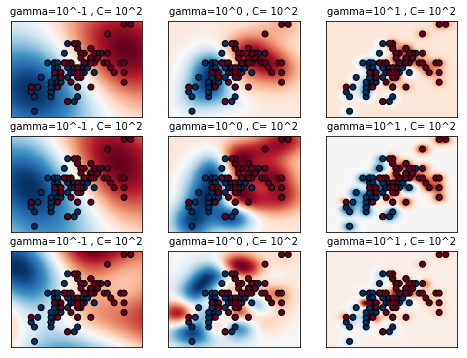

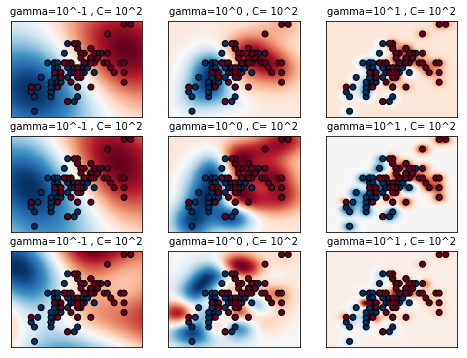

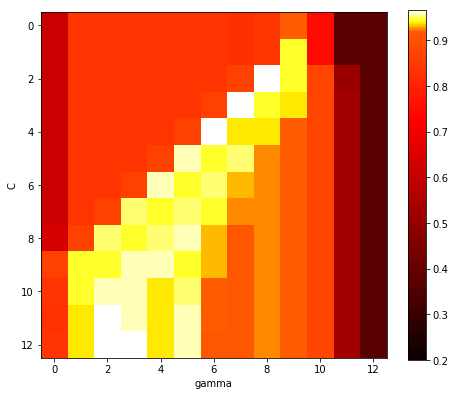

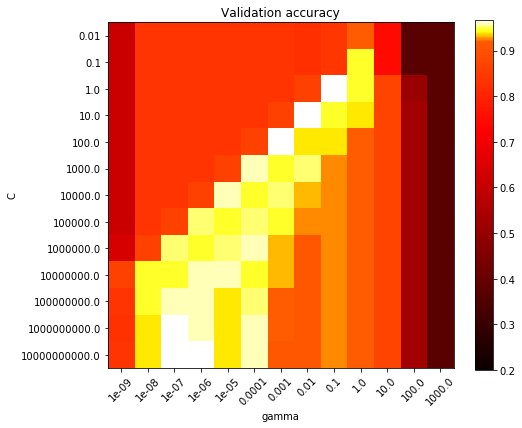

In [47]:
# Draw heatmap of the validation accuracy as a funtion of gamma and C 
# The score are encoded as colors with the colormatp varises from drak red to yellow 

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.96)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, 
          norm=MidPointNormalize(vmin=0.2,midpoint=0.92 ))

plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()